# 1. Introduction and Importing Libraries

Churn is a very important indicator in any service company. It refers to clients that decide to cancel or to not renew their contracts with a certrain service provider. In the case of our dataset, we will be dealing with clients the canceled their services with a Bank. Churn is an important indicator because commonly it is more expensive to attract new clients than to retain existing ones.

Churn can happen due to different causes, among them we can cite disatisfection of a client with the service provided, lack of attention to the client by the service provider or competitor intervention, in which competitors use strategies to attract clients. 

Understanding why Churn happens in a Bank is challenging, and it creates opportunities for improvements on services, proactive and reactive retention strategies and ultimately, profit increasing. 

In this report we will develop a ML model capable of predict Churn in a Bank company, and briefly discuss causes for Churn in the institution we are analysing.

In [1]:
#Importing libraries for basic data manipulation and visualisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time

import warnings
warnings.filterwarnings('ignore')

#Importing libraries to deal with geographic data manipulation and visualisation
from geopy.distance import geodesic
import plotly.express as px

#Importing libraries to deal with statistic problems
from scipy.stats import f_oneway
from scipy import stats

#Importing libraries to pre-process data
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Importing libraries to deal with Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, roc_auc_score

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
#Code to print all the plots centralised on the report.
from IPython.core.display import HTML

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# 2. Characterisation of the data

In [3]:
#Reading the dataframe
df = pd.read_csv('/Users/arthurassis/Documents/Personal Projects/CodSoft Internship/CUSTOMER CHURN PREDICTION DATASET/Churn_Modelling.csv')

In [4]:
#Verifying the first rows of the dataset to view basic information

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Printing the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.dtypes.value_counts()

int64      9
object     3
float64    2
dtype: int64

Our dataset is composed by 14 features, being 9 integers, 3 strings and 2 float features. It contrains 10000 observations, apparenly being each one of them information about a client of a bank. Our target variable is called 'Exited', that mean the same as 'Churned'.

## 2.1. Verifying nulls on our dataset

In [7]:
df.isna().sum().sum()

0

The dataset does not contain nulls.

## 2.2. Verifying features with only unique values in our dataset

In [8]:
#Verifying if df contains unique values in any of the columns:

df_unique = []
for column in df.columns:
    if df[column].is_unique:
        df_unique.append(column)
        print(f"Column '{column}' contain only unique values")

Column 'RowNumber' contain only unique values
Column 'CustomerId' contain only unique values


We verify that the features RowNumber and CustomerID contain only unique values, therefore, they offer no predictive power. Another consideration to be made is that we have unique CustomerId in each row, however, the surnames are not unique. Although the surname is not unique, each surname also represent a different person. That happens because different people might have the same surname. Let us verify how many unique values we have for the feature Surname.

In [9]:
df['Surname'].nunique()

2932

The dataset contains only 2932 different in its 10000 records, however, as we know that the surname still refers to different customer, we consider that it cannot be used as a predictor to churn. Therefore, te feature will be discarded together with RowNumber and CustomerID.

In [10]:
#Dropping features that offer no contribution to our analysis
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

## 2.3. Verifying duplicate rows

In [11]:
df.duplicated().sum()

0

As we can verify, our dataset does not contain duplicate rows.

## 2.4. Describing the data

In [12]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

# 3. Exploratory Data Analysis

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [16]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In our Exploratory Data Analysis, we will work in our 11 remaining feature, and try to unveil hiden patterns withint the data. To easen visualisation and manipulation of the data, lists will be created to separate the categories of the data.

In [17]:
discrete_features = ['CreditScore','Age','Tenure']
continuous_features = ['Balance', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited','NumOfProducts']

## 3.1. Analysing the categorical variables

In [18]:
#Defining a function to annotate our bar plots with their values on the top of the bar
def show_bar_label(plot, unit):
    if unit == 'percent':
        for p in plot.patches:                         #Openning a loop to annotate the bar plot bar-by-bar
            x = p.get_x() + p.get_width() / 2          #Getting the position for the text in the x-axis
            y = p.get_height()                         #Getting the position for the text in the y-axis
            plot.annotate(f'{p.get_height():.2f}%', (x, y), ha='center', va='bottom')  #Annotating the graph with
                                                                    #percentages using 2 decimals.
    elif unit == 'abs':
        for p in plot.patches:                         
            x = p.get_x() + p.get_width() / 2          
            y = p.get_height()                         
            plot.annotate(f'{p.get_height():.0f}', (x, y), ha='center', va='bottom')  #Annotating the graph with
                                                                    #absolute value with 0 decimals.

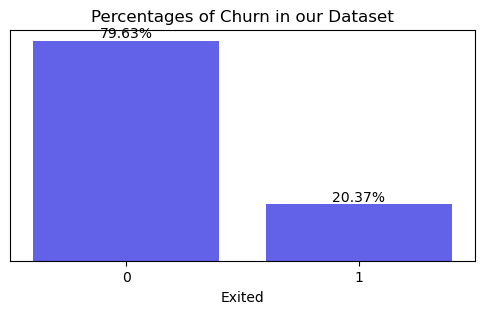

In [19]:
#Plotting side-by-side the percentage of churn
plt.figure(figsize = (6,3))    #Opening a plot canvas for the graphs
    
churn_plot = sns.countplot(data = df, x = 'Exited', stat = 'percent', color = 'b', alpha = 0.7)
show_bar_label(churn_plot, 'percent')         #Calling function to annotate the graphs with their percentages
churn_plot.set_title('Percentages of Churn in our Dataset')
churn_plot.yaxis.set_visible(False)

Our Exited variable contains nearly 80% of observations of customers that have not Churned, and just abova 20% of observations of clients that have churned. This figures indicate the dataset is unbalanced, and balancing it may be considered to enhance results of our Machine Learning models.

In [20]:
#Function used to plot barplots of a list of features
def dfPlotBarGraph (features, lenght, height):
    plt.figure(figsize = (lenght,height))
    for variable, i in (zip(features, range(len(features)))):
        plt.subplot(int(np.ceil(len(features)/4)),4,i+1)
        plt.title(variable)
        plot = df[variable].value_counts().plot(kind='bar', grid=True, rot=45)
        plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

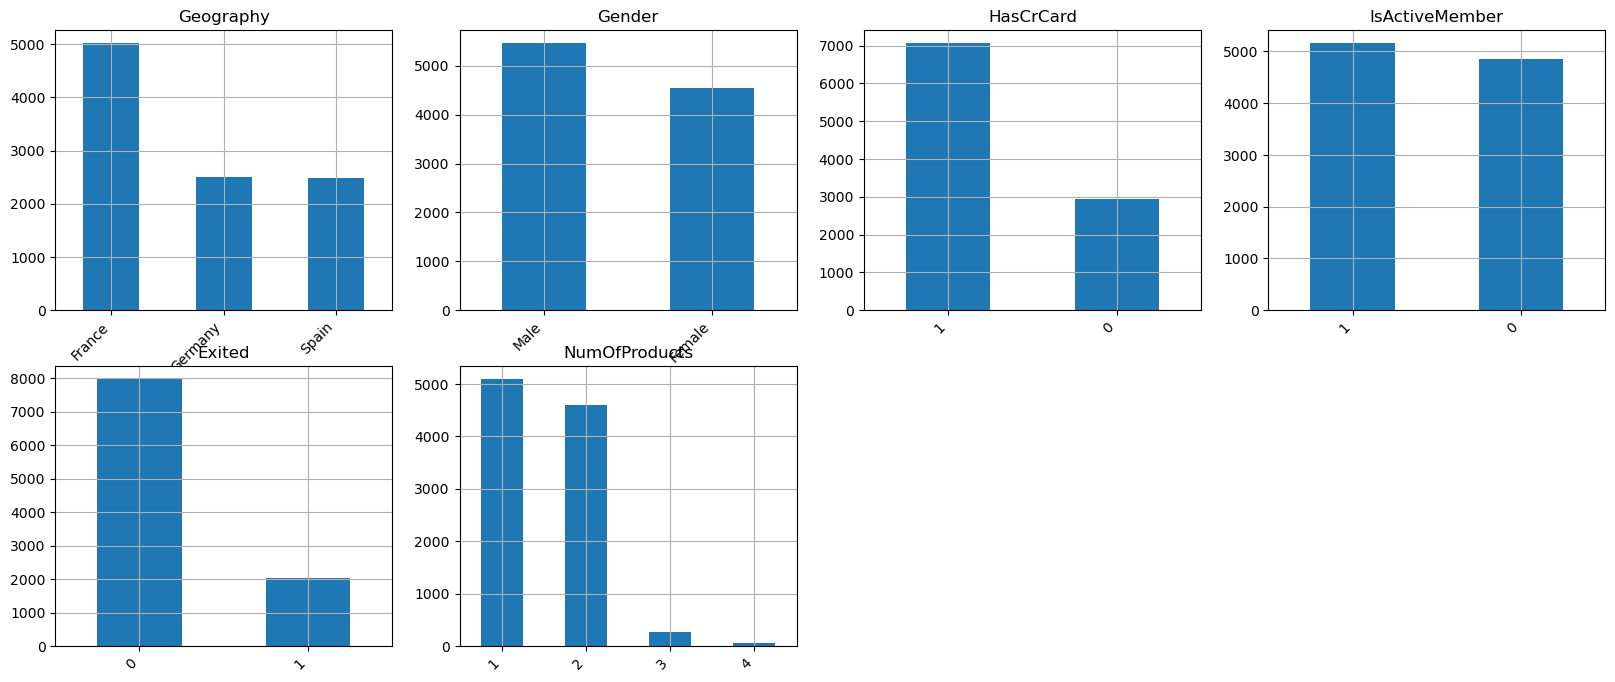

In [21]:
#Plotting using the function created
dfPlotBarGraph(categorical_features, 20, 8)

In [22]:
#Defining a function that plots stacked bar plots with all the features given: Target feature (x-axis), list of
#categorical features of interest, dimensions of the figure to optimize visualization.

def dfPlotGroupBar2 (featureY, featuresX, lenght, height):
    plt.figure(figsize = (lenght,height))
    for variableX in featuresX:
        cross_tab_prop = pd.crosstab(index=df[variableX],
                             columns=df[featureY],
                             normalize="index")
        cross_tab_prop.plot(kind='bar', 
                    stacked=True, figsize = (lenght, height));

<Figure size 500x300 with 0 Axes>

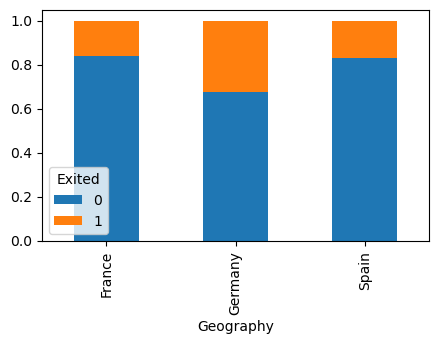

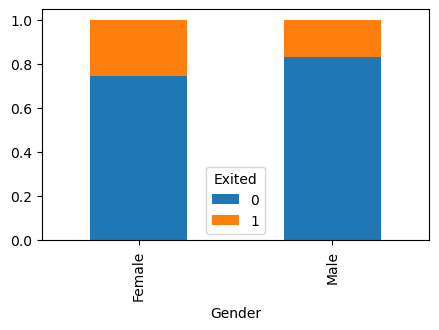

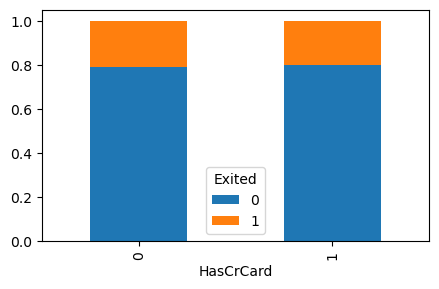

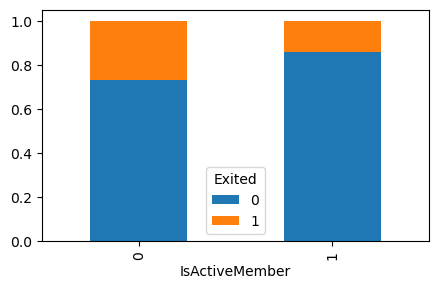

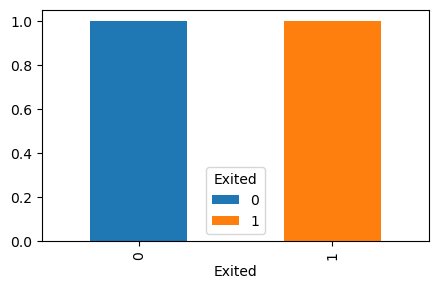

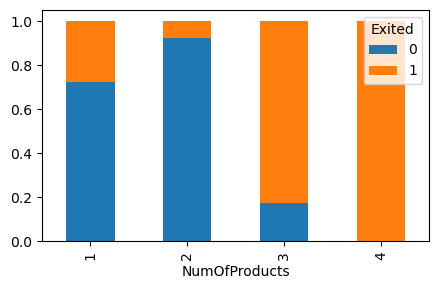

In [23]:
#Plotting using the function created
dfPlotGroupBar2('Exited', categorical_features, 5, 3)

We can verify some correlation of our features with our target variable. Alls the categorical variables seem to have a influence in our target variable, except 'HasCrCard'.

## 3.2. Analysing the numerical variables

In [24]:
#Creating a function to plot histogram of a list of features in a certain dataset.
def dfPlotHistGraph (dataframe, features, lenght, height):
    plt.figure(figsize = (lenght,height))
    for variable, i in (zip(features, range(len(features)))):
        plt.subplot(int(np.ceil(len(features)/4)),4,i+1)
        sns.histplot(data=dataframe, x=variable, kde=True)

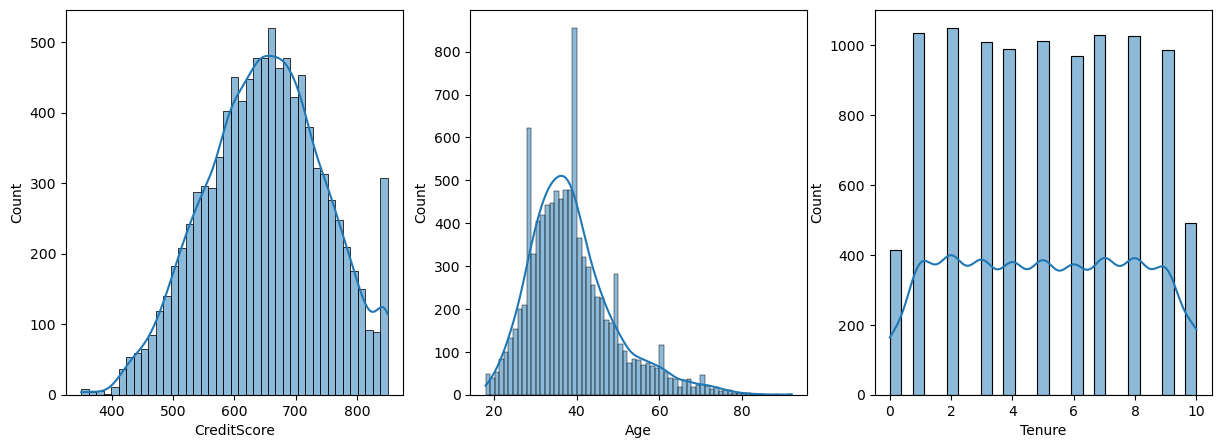

In [25]:
#Plotting using the function created
dfPlotHistGraph (df, discrete_features, 20, 5)

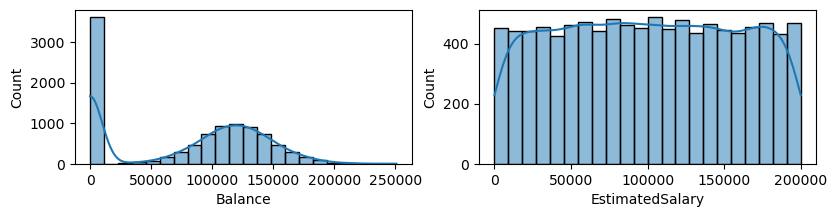

In [26]:
dfPlotHistGraph (df, continuous_features, 20, 2)

It is possible to verify that 'CreditScore' is slightly left-skewed, but aparently its distribution is dragged for a high number of customer with a maximum score. It is expected that if there is a maximum CreditScore, eventually clients will acumulate on the maximum, so we believe the dataset is correct. 

When we verify age, we consider it right-skewed, with more customers concentrated in their younger age. The skewness might need to be treated if the feature is going to be used as predictor in our ML models. 

The variable Balance catches our attention, because it has a apparently very normal distribution, except on the Balance equal to 0. This might be an important predictor to out target variable, and we will explore it further, spliting our dataset in Balance equal to 0, and balance different of 0.

In [27]:
#df1 represent balance equal to 0 and df represent balance different of 0.
df1 = df[df['Balance']==0]
df2 = df[df['Balance']!=0]

In [28]:
df2['Balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64

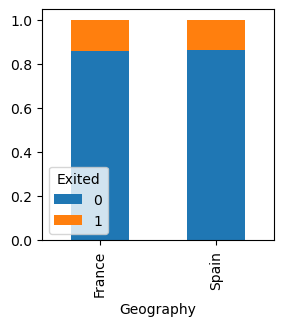

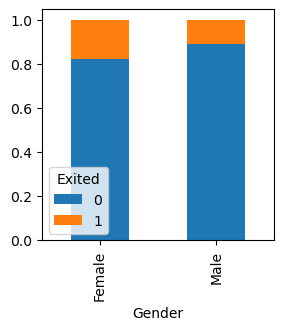

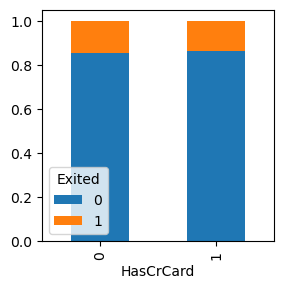

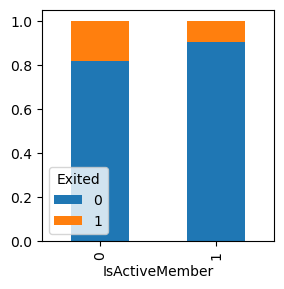

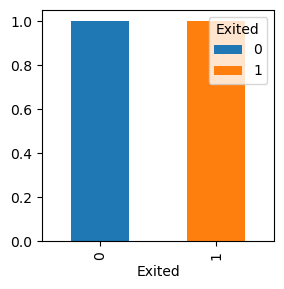

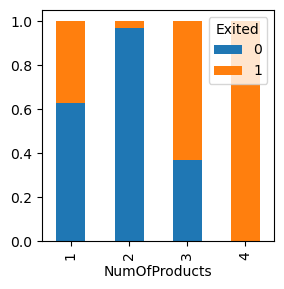

In [29]:
for variableX in categorical_features:
    cross_tab_prop = pd.crosstab(index=df[variableX],
                         columns=df1['Exited'],
                         normalize="index")
    cross_tab_prop.plot(kind='bar', 
                    stacked=True, figsize = (3, 3));

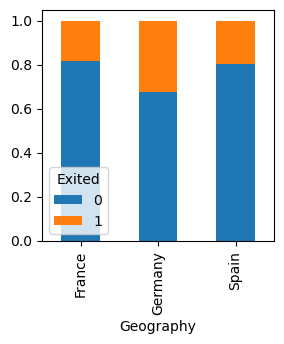

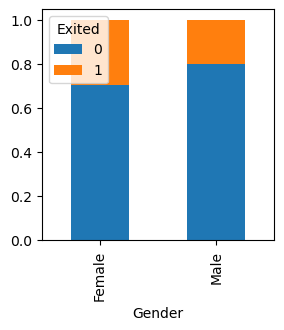

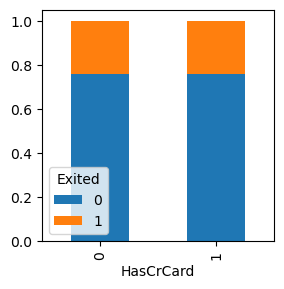

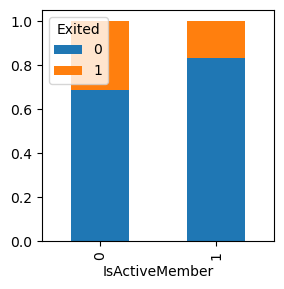

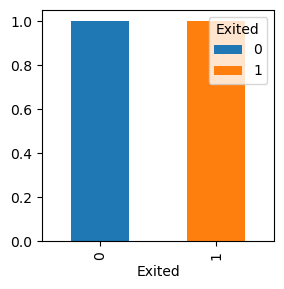

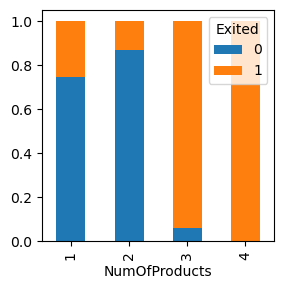

In [30]:
for variableX in categorical_features:
    cross_tab_prop = pd.crosstab(index=df[variableX],
                         columns=df2['Exited'],
                         normalize="index")
    cross_tab_prop.plot(kind='bar', 
                    stacked=True, figsize = (3, 3));

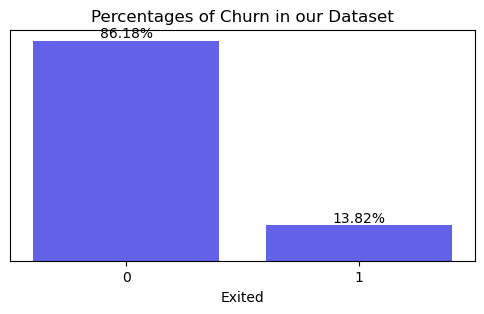

In [31]:
#Plotting side-by-side the percentage of churn
plt.figure(figsize = (6,3))    #Opening a plot canvas for the graphs
    
churn_plot = sns.countplot(data = df1, x = 'Exited', stat = 'percent', color = 'b', alpha = 0.7)
show_bar_label(churn_plot, 'percent')         #Calling function to annotate the graphs with their percentages
churn_plot.set_title('Percentages of Churn in our Dataset')
churn_plot.yaxis.set_visible(False)

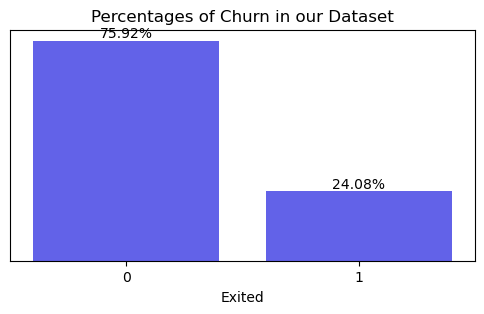

In [32]:
#Plotting side-by-side the percentage of churn
plt.figure(figsize = (6,3))    #Opening a plot canvas for the graphs
    
churn_plot = sns.countplot(data = df2, x = 'Exited', stat = 'percent', color = 'b', alpha = 0.7)
show_bar_label(churn_plot, 'percent')         #Calling function to annotate the graphs with their percentages
churn_plot.set_title('Percentages of Churn in our Dataset')
churn_plot.yaxis.set_visible(False)

To capture the different caracteristics of our dataset when Balance is equal and different to 0, we will add a feature called 'Balance_0' that is 1 (representing True), for Balance equal to 0, and 0 (representing False), for Balance different to 0. Adding the new feature will help ML models to identify differences on the categories,

In [33]:
#Creating a new variable Balance_0 using a Lambda funtion. If Balance == 0, new variable == 1
df['Balance_0'] = df['Balance'].apply(lambda x: 0 if x == 0 else 1)

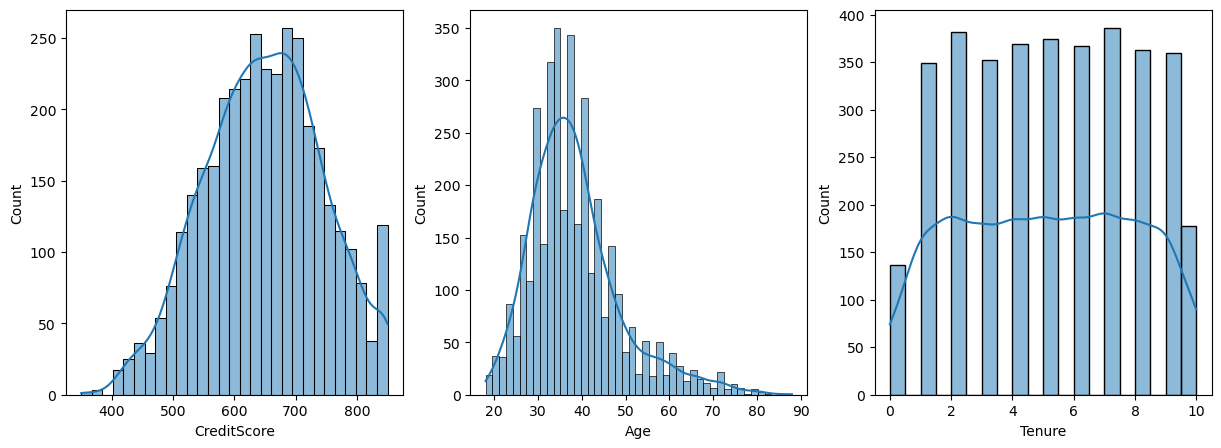

In [34]:
dfPlotHistGraph (df1, discrete_features, 20, 5)

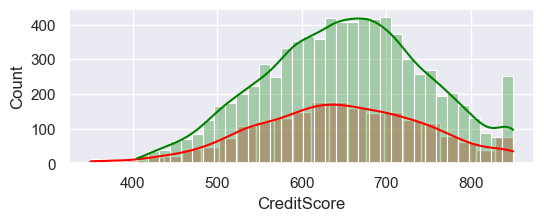

In [35]:
fig1= sns.set(rc = {'figure.figsize':(6,2)})
fig1 = sns.histplot(data=df[df['Exited']==1], x='CreditScore', kde= True, color = 'red', alpha=0.3)
fig1 = sns.histplot(data=df[df['Exited']==0], x='CreditScore', kde= True, color = 'green', alpha =0.3)

As we can verify, our dataset is significantly different when Balance is equal to 0, or different of 0, therefore, we will add a feature on the dataset identifying whether Balance is 0 or not.

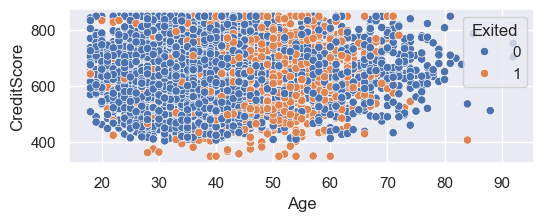

In [36]:
sns.scatterplot(df, x='Age', y='CreditScore', hue='Exited');

We cannot see any important pattern related to CreditScore, but we can clearly verify that there are more customers churning in a certain range of Age. Let us explore this in a histogram.

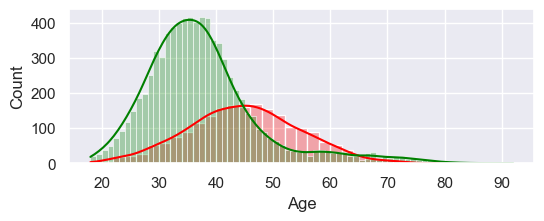

In [37]:
#Plotting an overlapping instogram of Age distribution for customer who churn and who not churned.
fig1= sns.set(rc = {'figure.figsize':(6,2)})
fig1 = sns.histplot(data=df[df['Exited']==1], x='Age', kde= True, color = 'red', alpha=0.3)
fig1 = sns.histplot(data=df[df['Exited']==0], x='Age', kde= True, color = 'green', alpha =0.3)

In [38]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

We verify that Age distribution is very different for customers who churned and who have not churned. In fact, we observe that customers who has not churned are mainly between their 30 and 40 years old, wheread customers who churned concentrate more between 40 a 50 years old. However, we see that after 65, we again have more customer non churners than churners. That indicate a non linear correlation of Age and our target variable. To help our models identifying this correlations, we will divide our feature Age into categories, and we believe that this categories might have a strong predictive power in our dataset.

In [39]:
#Splitting our dataset in groups of aproximately 10 year gap.
df['Age_Group'] = pd.cut(df['Age'], bins = [18,30,40,50,60,70, float('inf')],
                        labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '70+'])

In [40]:
#Visualising the first 5 rows of our dataset
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_0,Age_Group
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,41-50
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,41-50
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,41-50
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,31-40
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,41-50


In [41]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [42]:
#Defining a function that plots boxplot with all the features given: Target feature (x-axis), list of
#continuous features of interest, dimensions of the figure to optimize visualisation.

def dfPlotBoxplotCompGraph (featureX, featuresY, lenght, height):
    plt.figure(figsize = (lenght,height))
    for variableY, i in (zip(featuresY, range(len(featuresY)))):
        plt.subplot(int(np.ceil(len(featuresY)/3)),3,i+1)
        sns.boxplot(data=df, x=featureX,  y=variableY, palette = 'Blues')

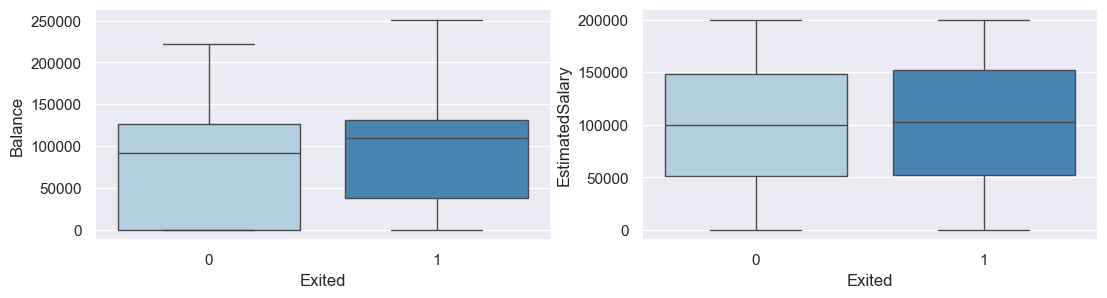

In [43]:
#Calling the function created before.

dfPlotBoxplotCompGraph('Exited', continuous_features, 20,3)

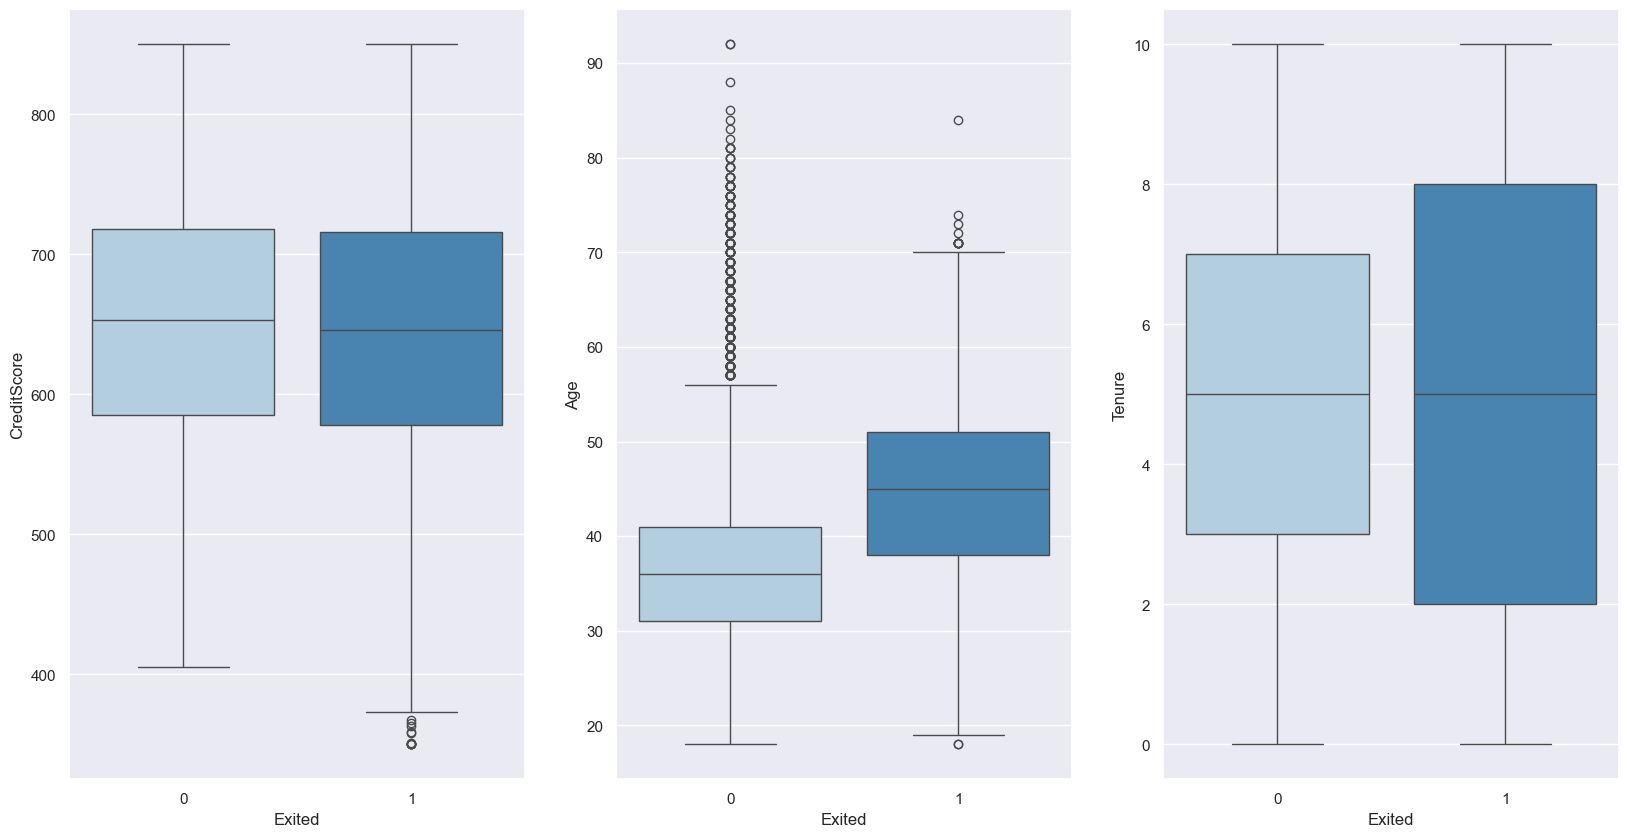

In [44]:

dfPlotBoxplotCompGraph('Exited', discrete_features, 20,10)

# 4. Correlation Analysis

Our analysis in this section will be performed using ANOVA and CHI Squared tests, using the following hypothesis:

Stating our hypothesis:

    H0: Variables are not correlated.
    HA: Variables are correlated.
    
p-value < 0.05: We reject our Null Hypothesis and we keep our alternate hypothesis.
p-value > 0.05: We consider we do not have enought evidence to reject our null hypothesis.

### Statistical analysis of correlation for numerical variables

In [45]:
#Creating a function to check correlation in different datasets, between a target variable and a list of features,
#using ANOVA for Numeric features and CHI2 for Categorical features
def stats_correlation (dataset, target_variable, features, type):

    if type == 'Numeric':
        #Creating a table to receive the results of every feature
        tableresults = []

#Creating an iterative function that calculates ANOVA using the function f_oneway in every feature of the list
#continuous created before, and storing the results with the classification of correlated or not correlated
#according to the p-value found for every feature. 

        for feature in features:
            testingmatrix = dataset.groupby(target_variable)[feature].apply(list)
            stat, pvalue = f_oneway(*testingmatrix)
            if pvalue<0.05:
                results = [feature, pvalue, 'Correlated']
                tableresults.append(results)
            else:
                results = [feature, pvalue, 'Not correlated']
                tableresults.append(results)
        continuous_table = pd.DataFrame(tableresults, columns=['Feature', 'p-value', 'Correlation'])
        print(continuous_table)
    elif type == 'Categorical':
#This function performs the same operations of the one explored before, however it uses the method Chi-Squared
#once we want to analyse correlations between two categorical variables. 

        tableresults = []
        for feature in features:
            testing_feature = pd.pivot_table(dataset, index=[target_variable],columns=[feature],aggfunc='size',
                                            fill_value = 0)
            chi2_stat, p_val, dof, ex = stats.chi2_contingency(testing_feature)
            if p_val<0.05:
                results = [feature, p_val, 'Correlated']
                tableresults.append(results)
            else:
                results = [feature, p_val, 'Not correlated']
                tableresults.append(results)
        categorical_table = pd.DataFrame(tableresults, columns=['Feature', 'p-value', 'Correlation'])
        print(categorical_table)
        

In [46]:
stats_correlation (df, 'Exited', continuous_features, 'Numeric')

           Feature       p-value     Correlation
0          Balance  1.275563e-32      Correlated
1  EstimatedSalary  2.264404e-01  Not correlated


In [47]:
stats_correlation (df1, 'Exited', continuous_features, 'Numeric')

           Feature   p-value     Correlation
0          Balance       NaN  Not correlated
1  EstimatedSalary  0.243001  Not correlated


In [48]:
stats_correlation (df2, 'Exited', continuous_features, 'Numeric')

           Feature   p-value     Correlation
0          Balance  0.169247  Not correlated
1  EstimatedSalary  0.612839  Not correlated


In [49]:
stats_correlation(df, 'Exited', discrete_features, 'Numeric')

       Feature        p-value     Correlation
0  CreditScore   6.738214e-03      Correlated
1          Age  1.239931e-186      Correlated
2       Tenure   1.615268e-01  Not correlated


In [50]:
stats_correlation (df1, 'Exited', discrete_features, 'Numeric')

       Feature       p-value     Correlation
0  CreditScore  1.613962e-01  Not correlated
1          Age  7.010266e-52      Correlated
2       Tenure  2.658887e-02      Correlated


In [51]:
stats_correlation (df2, 'Exited', discrete_features, 'Numeric')

       Feature        p-value     Correlation
0  CreditScore   1.383411e-02      Correlated
1          Age  2.612740e-134      Correlated
2       Tenure   9.222893e-01  Not correlated


### Statistical Analysis of correlation for categorical features

In [52]:
stats_correlation (df, 'Exited', categorical_features, 'Categorical')

          Feature       p-value     Correlation
0       Geography  3.830318e-66      Correlated
1          Gender  2.248210e-26      Correlated
2       HasCrCard  4.923724e-01  Not correlated
3  IsActiveMember  8.785858e-55      Correlated
4          Exited  0.000000e+00      Correlated
5   NumOfProducts  0.000000e+00      Correlated


In [53]:
stats_correlation (df1, 'Exited', categorical_features, 'Categorical')

          Feature        p-value     Correlation
0       Geography   8.182818e-01  Not correlated
1          Gender   3.977624e-09      Correlated
2       HasCrCard   5.346709e-01  Not correlated
3  IsActiveMember   4.024555e-14      Correlated
4          Exited   0.000000e+00      Correlated
5   NumOfProducts  1.176173e-205      Correlated


In [54]:
stats_correlation (df2, 'Exited', categorical_features, 'Categorical')

          Feature        p-value     Correlation
0       Geography   2.944272e-35      Correlated
1          Gender   2.494345e-19      Correlated
2       HasCrCard   8.897336e-01  Not correlated
3  IsActiveMember   1.083177e-42      Correlated
4          Exited   0.000000e+00      Correlated
5   NumOfProducts  6.376790e-158      Correlated


In [55]:
stats_correlation (df, 'Exited', ['Balance_0'], 'Categorical')

     Feature       p-value Correlation
0  Balance_0  2.752618e-34  Correlated


In [56]:
stats_correlation (df, 'Exited', ['Age_Group'], 'Categorical')

     Feature        p-value Correlation
0  Age_Group  7.469745e-283  Correlated


As we can verify, our dataset has different correlations depending of the variable Balance, for instance, if a person has its balance equal to 0, credit score does not influnce our target variable, but tenure does. On the other hand, for the cases balance differnet of 0, credit score does influence our target variable, but Tenure does not. What we can guarantee in any case is that 'EstimatedSalary' and 'HasCrCard', do not influence at all in our target variable. On the other hand, we consider the correlation between Tenure and our Target Variable very weak, therefore we will also drop the variable 'Tenure'

Another interesting conclusion we can reach is about the variable 'Balance'. We can verify that in our original dataset, the variable 'Balance' is correlated to 'Exited'. However, when we drop the records with Balance equal to 0, in our df2, the variable Balance is not correlated to 'Exited'. That indicates to us the correlation between 'Balance' and 'Exited', comes rather from the different between Balance equal and different from 0, than from the distribution. This indicative is even stronger when we verify that our engineered variable Balance_0 is more strongly correlated to 'Exited', than the variable 'Balance' itself, once o Chi-squared test we obtain a p-value 100 times smaller. Therefore, we will discard the variable 'Balance', and keep only the engineered variable 'Balance_0'.

We can also take from our EDA and Correlation Analysis is that the feature 'Geography' behaves very similarly in its two Categories Spain and France, so that when we verify df1, in which we only have the categories Spain and France present, we do not verify correlation with our target variable. To simplify our model, we will unite this two categories in 1 single, called Spain-France.

One last conclusion is that splitting our Age into Age groups improves its correlation with the target variable, and therefore we will use Age-Group instead of Age.

In [57]:
#Creating a new variable replace both spain and france for an unified category 'Spain-France'
df['Geography_2'] = df['Geography'].apply(lambda x: 'Spain-France' if x == 'Spain' or x == 'France'
                                    else 'Germany')

In [58]:
#Dropping categories clearly without predictive power from our dataset
df.drop(columns = ['EstimatedSalary', 'HasCrCard', 'Balance', 'Age', 'Tenure', 'Geography'], inplace = True)

In [59]:
df.head()

,CreditScore,Gender,NumOfProducts,IsActiveMember,Exited,Balance_0,Age_Group,Geography_2
0,619,Female,1,1,1,0,41-50,Spain-France
1,608,Female,1,1,0,1,41-50,Spain-France
2,502,Female,3,0,1,1,41-50,Spain-France
3,699,Female,2,0,0,0,31-40,Spain-France
4,850,Female,1,1,0,1,41-50,Spain-France


The last step to before we apply our Machine Learning models is to binary encode our variables 'Gender' and 'Geography_2'.

In [60]:
#Encoding our Binary Variable assigning randomly 1 and 0 for each category.
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
df['Geography_2'] = df['Geography_2'].map({'Spain-France':0, 'Germany': 1})

# 5. Developing our Machine Learning Models

In [61]:
df.head()

,CreditScore,Gender,NumOfProducts,IsActiveMember,Exited,Balance_0,Age_Group,Geography_2
0,619,1,1,1,1,0,41-50,0
1,608,1,1,1,0,1,41-50,0
2,502,1,3,0,1,1,41-50,0
3,699,1,2,0,0,0,31-40,0
4,850,1,1,1,0,1,41-50,0


#### Discussions on predictors and ML Models developed

As we could verify from our EDA and Correlation analysis, some variables clearly presented correlation with the variable Churn and some clearly presented to not be correlated. However, we could not get to a clear conclusion in regards to the feature 'CreditScore', therefore we will model twice including and excluding the variable and analysing the results that better suit our goals. 'CreditScore' is also the only numerical variable in our dataset, all the remaining will be treated as categorical, including 'NumOfProducts', once it presents a non-linear correlation to our dataset, and we only have 4 categories, which will not increase significantly our processing time, given our dataset contains only 1000 records. For this reason, we do not believe scaling our numerical variable is necessary.

The models that will be tested are: Logistic Regression, Random Forests, and Gradient Boosting, as recommended. We will also evaluate all the models upsampling the target variable to balance it, using SMOTE technic. 

#### Metric chosen for evaluation of our models

The choice of an evaluation metric for our ML Model goes back to the business context. In the context of churning, our goal is predicting the most of the Churners positively, independent of identifying False Positives, or identifying non-churners as churners. Translating that to our ML Metrics, the metric that best represents our goal is Recall, because it measures the True Positives, out of all Positives. Hence, having a high recall means increasing the True Positives (Customers identified as Churn that have Churned), and minimising False Negatives (Customers identified as Non Churn that have Churned). The advantages of using 'Recall' as metric in this context are:
1. Cost of false negative: having false negatives is more costly than having false positives.
2. Proactive retention: false positives indicate customer at risk of churning, and open field for retention actions.

In [62]:
#Performing one hot encoding in our categorical variables
df_dummies = pd.get_dummies(df, columns = ['Age_Group', 'NumOfProducts'])

In [63]:
#Creating the models that will be trained and used to predict on our dataset
modelLR = LogisticRegression(solver='liblinear', multi_class='ovr')
modelRFC = RandomForestClassifier()
modelGBC = GradientBoostingClassifier()

## 5.1. ML Models Including CreditScore as predictor

In [64]:
#Spliting our dataset into Predictors and Target Variable.
X = df_dummies.drop(columns = ['Exited'])
y = df_dummies['Exited']

In [65]:
#Creating list with all the model that will be applied

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('RFC', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))

In [66]:
#Splitting the dataset into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25, stratify = y)

In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7500, 15), (2500, 15), (7500,), (2500,))

In [68]:
#Testing all models listed before inside of a loop. The test includes cross validation using StratifiedKFold
#that assures every fold contains the same amount of Trues and Falses, once our dataset is unbalanced,
#and it is used 10 Splits of the dataset.

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.416907 (0.041096)
RFC: 0.475138 (0.039133)
GBC: 0.430637 (0.055738)


### Applying SMOTE to balance our target variable

In [69]:
#Testing all models listed before inside of a loop. The test includes cross validation using StratifiedKFold
#that assures every fold contains the same amount of Trues and Falses, once our dataset is unbalanced,
#and it is used 10 Splits of the dataset.

results = []
names = []
for name, model in models:
    pipeline = make_pipeline(SMOTE(random_state = 42), model)
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.573968 (0.036963)
RFC: 0.509172 (0.047715)
GBC: 0.568692 (0.046668)


### Printing the complete metrics of the dataset using SMOTE

In [70]:
sm = SMOTE(random_state = 42)

In [71]:
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

Accuracy Score:  0.8424

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1991
           1       0.61      0.62      0.62       509

    accuracy                           0.84      2500
   macro avg       0.76      0.76      0.76      2500
weighted avg       0.84      0.84      0.84      2500



<Axes: >

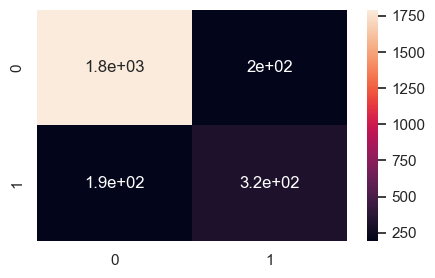

In [72]:
#The best model found was logistic regression, so the model will be fit into our training data, and used
#to predict our validation data.

modelLR.fit(X_train_resampled, y_train_resampled)
y_pred = modelLR.predict(X_test)

#Printing accuracy Score
print("Accuracy Score: ", accuracy_score(y_test, y_pred))


#Printing classification report
print("\nClassification Report: "'\n', classification_report(y_test, y_pred))

#Creating and printing Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=[5, 3])
sns.heatmap(cm, annot = True)

Accuracy Score:  0.792

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1991
           1       0.49      0.52      0.50       509

    accuracy                           0.79      2500
   macro avg       0.68      0.69      0.69      2500
weighted avg       0.80      0.79      0.79      2500



<Axes: >

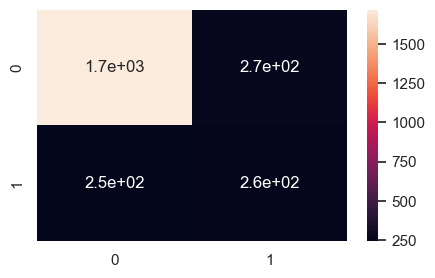

In [73]:
#The best model found was logistic regression, so the model will be fit into our training data, and used
#to predict our validation data.

modelRFC.fit(X_train_resampled, y_train_resampled)
y_pred = modelRFC.predict(X_test)

#Printing accuracy Score
print("Accuracy Score: ", accuracy_score(y_test, y_pred))


#Printing classification report
print("\nClassification Report: "'\n', classification_report(y_test, y_pred))

#Creating and printing Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=[5, 3])
sns.heatmap(cm, annot = True)

Accuracy Score:  0.8408

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      1991
           1       0.60      0.65      0.62       509

    accuracy                           0.84      2500
   macro avg       0.75      0.77      0.76      2500
weighted avg       0.85      0.84      0.84      2500



<Axes: >

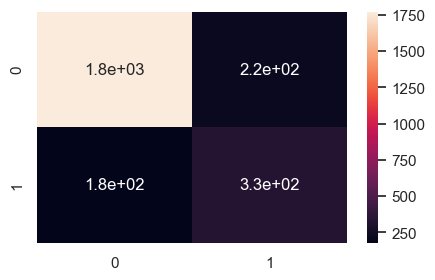

In [74]:
#The best model found was logistic regression, so the model will be fit into our training data, and used
#to predict our validation data.

modelGBC.fit(X_train_resampled, y_train_resampled)
y_pred = modelGBC.predict(X_test)

#Printing accuracy Score
print("Accuracy Score: ", accuracy_score(y_test, y_pred))


#Printing classification report
print("\nClassification Report: "'\n', classification_report(y_test, y_pred))

#Creating and printing Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=[5, 3])
sns.heatmap(cm, annot = True)

## 5.2. ML Models excluding CreditScore as predictor

In [75]:
X = df_dummies.drop(columns = ['Exited', 'CreditScore'])
y = df_dummies['Exited']

In [76]:
#Splitting the dataset into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25, stratify = y)

In [77]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7500, 14), (2500, 14), (7500,), (2500,))

In [78]:
#Testing all models listed before inside of a loop. The test includes cross validation using StratifiedKFold
#that assures every fold contains the same amount of Trues and Falses, once our dataset is unbalanced,
#and it is used 20 Splits of the dataset.

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.421491 (0.048040)
RFC: 0.446986 (0.051235)
GBC: 0.428676 (0.050120)


### Applying SMOTE to balance our target variable

In [79]:
#Testing all models listed before inside of a loop. The test includes cross validation using StratifiedKFold
#that assures every fold contains the same amount of Trues and Falses, once our dataset is unbalanced,
#and it is used 20 Splits of the dataset.

results = []
names = []
for name, model in models:
    pipeline = make_pipeline(SMOTE(random_state = 42), model)
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.743434 (0.035206)
RFC: 0.743421 (0.037013)
GBC: 0.736920 (0.026073)


### Printing the complete metrics of the dataset using SMOTE

In [80]:
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

Accuracy Score:  0.7824

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.79      0.85      1991
           1       0.48      0.76      0.59       509

    accuracy                           0.78      2500
   macro avg       0.70      0.77      0.72      2500
weighted avg       0.84      0.78      0.80      2500



<Axes: >

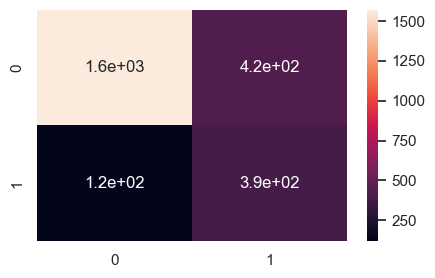

In [81]:
#The best model found was logistic regression, so the model will be fit into our training data, and used
#to predict our validation data.

modelLR.fit(X_train_resampled, y_train_resampled)
y_pred = modelLR.predict(X_test)

#Printing accuracy Score
print("Accuracy Score: ", accuracy_score(y_test, y_pred))


#Printing classification report
print("\nClassification Report: "'\n', classification_report(y_test, y_pred))

#Creating and printing Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=[5, 3])
sns.heatmap(cm, annot = True)

Accuracy Score:  0.778

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.78      0.85      1991
           1       0.47      0.78      0.59       509

    accuracy                           0.78      2500
   macro avg       0.70      0.78      0.72      2500
weighted avg       0.84      0.78      0.80      2500



<Axes: >

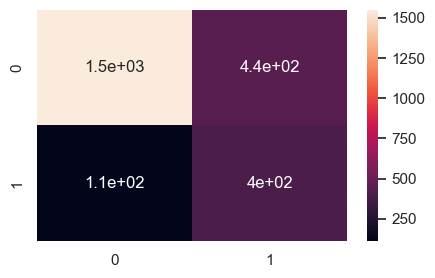

In [82]:
#The best model found was logistic regression, so the model will be fit into our training data, and used
#to predict our validation data.

modelRFC.fit(X_train_resampled, y_train_resampled)
y_pred = modelRFC.predict(X_test)

#Printing accuracy Score
print("Accuracy Score: ", accuracy_score(y_test, y_pred))


#Printing classification report
print("\nClassification Report: "'\n', classification_report(y_test, y_pred))

#Creating and printing Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=[5, 3])
sns.heatmap(cm, annot = True)

Accuracy Score:  0.7972

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.81      0.86      1991
           1       0.50      0.77      0.61       509

    accuracy                           0.80      2500
   macro avg       0.72      0.79      0.73      2500
weighted avg       0.84      0.80      0.81      2500



<Axes: >

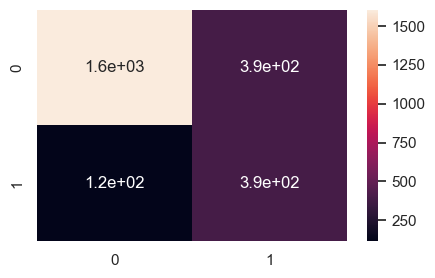

In [83]:
#The best model found was logistic regression, so the model will be fit into our training data, and used
#to predict our validation data.

modelGBC.fit(X_train_resampled, y_train_resampled)
y_pred = modelGBC.predict(X_test)

#Printing accuracy Score
print("Accuracy Score: ", accuracy_score(y_test, y_pred))


#Printing classification report
print("\nClassification Report: "'\n', classification_report(y_test, y_pred))

#Creating and printing Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=[5, 3])
sns.heatmap(cm, annot = True)

## 5.3. Model Selection

As we can verify from our results presented above, the upsampling using SMOTE improves our results both in the models using and not using CreditScore as predictor. 

In regards to the feature 'CreditScore' itself, the metrics are divided. When we use 'CreditScore' as predictor, we 
verify higher figures in 'Accurary', as we predict more True Negatives, reaching almost 85%. However, the high accuracy comes at the cost of high False Negatives, which are customers mistakingly identified as non-churners, and we have Recalls as low as 65%. When we evaluate our chosen metric, dropping 'CreditScore' as a predictor brings a high enhance on 'Recall, reaching close to 80%, at a cost of a drop in accuracy to just below 80%.

As we discussed before, Recall is our most important metric, and we will move forward with the models that bring a better performance in this metric for us, therefore, the models that does consider 'CreditScore' as a predictor. 

The model that reaches a higher absolute Recall of 78% is the Random Forest, and the model with the highest accuracy, by the cost of only 1% in Recall is Gradient Boosting.

## 5.4. Hyperparameter Tunning

We will first verify the Recall of our models when cross validated, and then will verify how much we can improve on the models using GridSearchCV.

In [84]:
#Creating the type of fold that will be used for crossvalidation
k_folds = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

To ensure there is no leakage of information from our train dataset to our test dataset, which could lead to unrealisticly good models performing better than they would in reality, we will create Pipelines to apply SMOTE only on the train part of our dataset in each split, and the classifier.

In [85]:
#Creating a pipeling to apply SMOTE after the spliting of the dataset in the k_folds, and after use our classifier
pipelineLR = Pipeline([
    ('smote', SMOTE(random_state = 42)),
    ('classifier', modelLR)])

In [86]:
#Calling the method to fit our data and output the score, and calculate its mean.
scores = cross_val_score(pipelineLR, X, y, scoring = 'recall', cv = k_folds)
print(scores, scores.mean())

[0.73529412 0.79411765 0.79411765 0.66666667 0.74509804 0.72058824
 0.76960784 0.74384236 0.76847291 0.73399015] 0.7471795614797643


In [87]:
pipelineRF = Pipeline([
    ('smote', SMOTE(random_state = 42)),
    ('classifier', modelRFC)])

In [88]:
scores = cross_val_score(pipelineRF, X, y, scoring = 'recall', cv = k_folds)
print(scores, scores.mean())

[0.72058824 0.75       0.81372549 0.58823529 0.70588235 0.75490196
 0.81862745 0.75862069 0.75862069 0.72906404] 0.7398266203032937


In [89]:
pipelineGB = Pipeline([
    ('smote', SMOTE(random_state = 42)),
    ('classifier', modelGBC)])

In [90]:
scores = cross_val_score(pipelineGB, X, y, scoring = 'recall', cv = k_folds)
print(scores, scores.mean())

[0.7254902  0.7745098  0.79901961 0.59313725 0.73529412 0.73039216
 0.78431373 0.73399015 0.74876847 0.70935961] 0.7334275089346083


In [91]:
# Create the parameter grid based on the results of random search 
param_gridrf = {
    'smote__sampling_strategy': [0.5, 0.75, 1.0],
    'classifier__C': [0.01, 0.1, 1, 10, 100], 
    'classifier__penalty': ['l1', 'l2', 'elasticnet', None],
    'classifier__solver': ['lbfgs', 'liblinear', 'saga'],
    'classifier__class_weight': [None, 'balanced']
        
}
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
# Instantiate the grid search model
grid_search_LR = GridSearchCV(pipelineLR, param_grid = param_gridrf, 
                           cv = k_folds, n_jobs = -1,verbose = 1, scoring="recall")

In [92]:
grid_search_LR.fit(X,y)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require 

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anacond

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anacond

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/a

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaco

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/ana

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anacond

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anacond

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/ana

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/o

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/o

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_mode

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anacond

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/o

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/o

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anacond

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anacond

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/a

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/o

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_mode

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anacond

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/a

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/o

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_mode

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt

/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arthurassis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('classifier',
                                        LogisticRegression(multi_class='ovr',
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__class_weight': [None, 'balanced'],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 None],
                         'classifier__solver': ['lbfgs', 'liblinear', 'saga'],
                         'smote__sampling_strategy': [0.5, 0.75, 1.0]},
             scoring='recall', verbose=1)

In [93]:
print("Best parameters:", grid_search_LR.best_params_)
print("Best cross-validation score:", grid_search_LR.best_score_)

Best parameters: {'classifier__C': 0.01, 'classifier__class_weight': None, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs', 'smote__sampling_strategy': 1.0}
Best cross-validation score: 0.7584709745967352


In [94]:
# Create the parameter grid based on the results of random search 
param_gridrf = {
    'smote__sampling_strategy': [0.5, 0.75, 1.0],
    'classifier__n_estimators': [100, 200,300], 
    'classifier__max_features': ['sqrt', 'log', None]
    
}
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
# Instantiate the grid search model
grid_search_rf = GridSearchCV(pipelineRF, param_grid = param_gridrf, 
                           cv = k_folds, n_jobs = -1,verbose = 1, scoring="recall")

In [95]:
grid_search_rf.fit(X,y)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_features': ['sqrt', 'log', None],
                         'classifier__n_estimators': [100, 200, 300],
                         'smote__sampling_strategy': [0.5, 0.75, 1.0]},
             scoring='recall', verbose=1)

In [96]:
print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validation score:", grid_search_rf.best_score_)

Best parameters: {'classifier__max_features': None, 'classifier__n_estimators': 200, 'smote__sampling_strategy': 1.0}
Best cross-validation score: 0.7427605524968608


In [97]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'smote__sampling_strategy': [0.5, 0.75, 1.0],
    'classifier__n_estimators': [100, 200, 300], 
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
    
}
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
# Instantiate the grid search model
grid_search_GB = GridSearchCV(pipelineGB, param_grid = param_grid, 
                           cv = k_folds, n_jobs = -1,verbose = 1, scoring="recall")

In [98]:
grid_search_GB.fit(X,y)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('classifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 200, 300],
                         'smote__sampling_strategy': [0.5, 0.75, 1.0]},
             scoring='recall', verbose=1)

In [99]:
print("Best parameters:", grid_search_GB.best_params_)
print("Best cross-validation score:", grid_search_GB.best_score_)

Best parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'smote__sampling_strategy': 1.0}
Best cross-validation score: 0.7491451753115038


In [100]:
BEST_model =  Pipeline([
    ('smote', SMOTE(random_state = 42, sampling_strategy = 1.0)),
    ('classifier', LogisticRegression(C= 0.01, class_weight= None, penalty='l2',
                                     solver= 'lbfgs'))])

In [101]:
X = df_dummies.drop(columns = ['Exited', 'CreditScore'])
y = df_dummies['Exited']

In [102]:
#Splitting the dataset into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25, stratify = y)

In [103]:
BEST_model.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42, sampling_strategy=1.0)),
                ('classifier', LogisticRegression(C=0.01))])

In [104]:
y_pred = BEST_model.predict(X_test)

Accuracy Score:  0.7716

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.77      0.84      1991
           1       0.46      0.77      0.58       509

    accuracy                           0.77      2500
   macro avg       0.70      0.77      0.71      2500
weighted avg       0.83      0.77      0.79      2500



<Axes: >

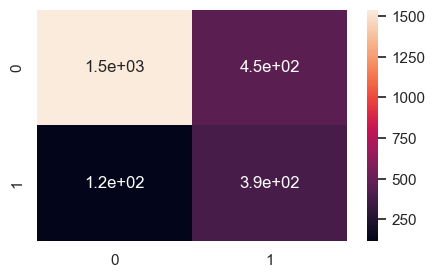

In [105]:
#Printing accuracy Score
print("Accuracy Score: ", accuracy_score(y_test, y_pred))


#Printing classification report
print("\nClassification Report: "'\n', classification_report(y_test, y_pred))

#Creating and printing Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=[5, 3])
sns.heatmap(cm, annot = True)

# 6. RESULTS AND CONCLUSIONS

It was possible to verify, that contraposing our initial results, when we cross validated our results, Logistic Regression was the best model in the metric Recall, reaching almost 75% of Recall when validated in a Dataset split in 10 differente folds. For this reason, we decided to tune all the models and re-validate them, to see which model would reach the best results overall. Again, we could verify that Logistic Regression, with its optmised hyperparameters, reached almost 76% of 'Recall'. Hyperparameter tunning has incresed almost 1% on the Recall of the model.

Having in mind what had been discussed before, we consider that Logistic Regression with the hyperparameters explored is the best strategy for the dataset. However, we can verify that when we apply the model with the best parameters into our training and testing dataset, we get a lot of False Positives. False positives, as discussed before, are customers believe to have a high chance of churning, therefore, using the False positives might be part of a retention strategy. Depending on the costs involved for such strategies, and on budget available, other models could be explored, so that we still have a high 'Recall', but a higher Accurary or Precision. 

The report demonstrate the development of a ML model capable of identifying correctly 76% of the customers that have churned on this bank.